### Data dictionary
1. Open: Opening price of the share
2. High: Highest price of the share
3. Low: Lowest price of the share
4. Close: Closing price of the share
5. `Adjusted Close: Price adjusted for various corporate actions`
6. Volume: Number of shares sold

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, acf, pacf
%matplotlib inline

In [2]:
df = pd.read_csv('AAPL.csv', index_col='Date', parse_dates=True, dayfirst=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2011 entries, 2012-01-03 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2011 non-null   float64
 1   High       2011 non-null   float64
 2   Low        2011 non-null   float64
 3   Close      2011 non-null   float64
 4   Adj Close  2011 non-null   float64
 5   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.0 KB


In [5]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.duplicated().sum()

0

### Checking to see if there are any missing dates in the data

In [7]:
from collections import Counter

org = pd.date_range(df.index[0], df.index[-1])
org

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-07', '2012-01-08', '2012-01-09', '2012-01-10',
               '2012-01-11', '2012-01-12',
               ...
               '2019-12-21', '2019-12-22', '2019-12-23', '2019-12-24',
               '2019-12-25', '2019-12-26', '2019-12-27', '2019-12-28',
               '2019-12-29', '2019-12-30'],
              dtype='datetime64[ns]', length=2919, freq='D')

In [8]:
org = pd.DataFrame(org.day_name(), index=org, columns=['Day'])
org = org[(org['Day'] != 'Saturday') & (org['Day'] != 'Sunday')]
org

,Day
2012-01-03,Tuesday
2012-01-04,Wednesday
2012-01-05,Thursday
2012-01-06,Friday
2012-01-09,Monday
...,...
2019-12-24,Tuesday
2019-12-25,Wednesday
2019-12-26,Thursday
2019-12-27,Friday


In [9]:
act = Counter(df.index)
org = Counter(org.index)

In [10]:
missing_days = list((org - act).keys())
print(f'There are {len(missing_days)} missing dates in the dataset')

There are 74 missing dates in the dataset


In [11]:
df['Gain'] = df['Adj Close'].pct_change()
df

,Open,High,Low,Close,Adj Close,Volume,Gain
Date,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,NaN
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,0.005374
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,0.011102
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,0.010454
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,-0.001586
...,...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000,0.016318
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700,0.000951
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300,0.019840


In [12]:
df['Month'] = df.index.strftime('%b')
df['Year'] = df.index.strftime('%Y')
df['Day'] = df.index.strftime('%d')
df

,Open,High,Low,Close,Adj Close,Volume,Gain,Month,Year,Day
Date,,,,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,NaN,Jan,2012,03
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,0.005374,Jan,2012,04
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,0.011102,Jan,2012,05
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,0.010454,Jan,2012,06
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,-0.001586,Jan,2012,09
...,...,...,...,...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000,0.016318,Dec,2019,23
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700,0.000951,Dec,2019,24
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300,0.019840,Dec,2019,26


### Lineplot for Gain from 2012 to 2019

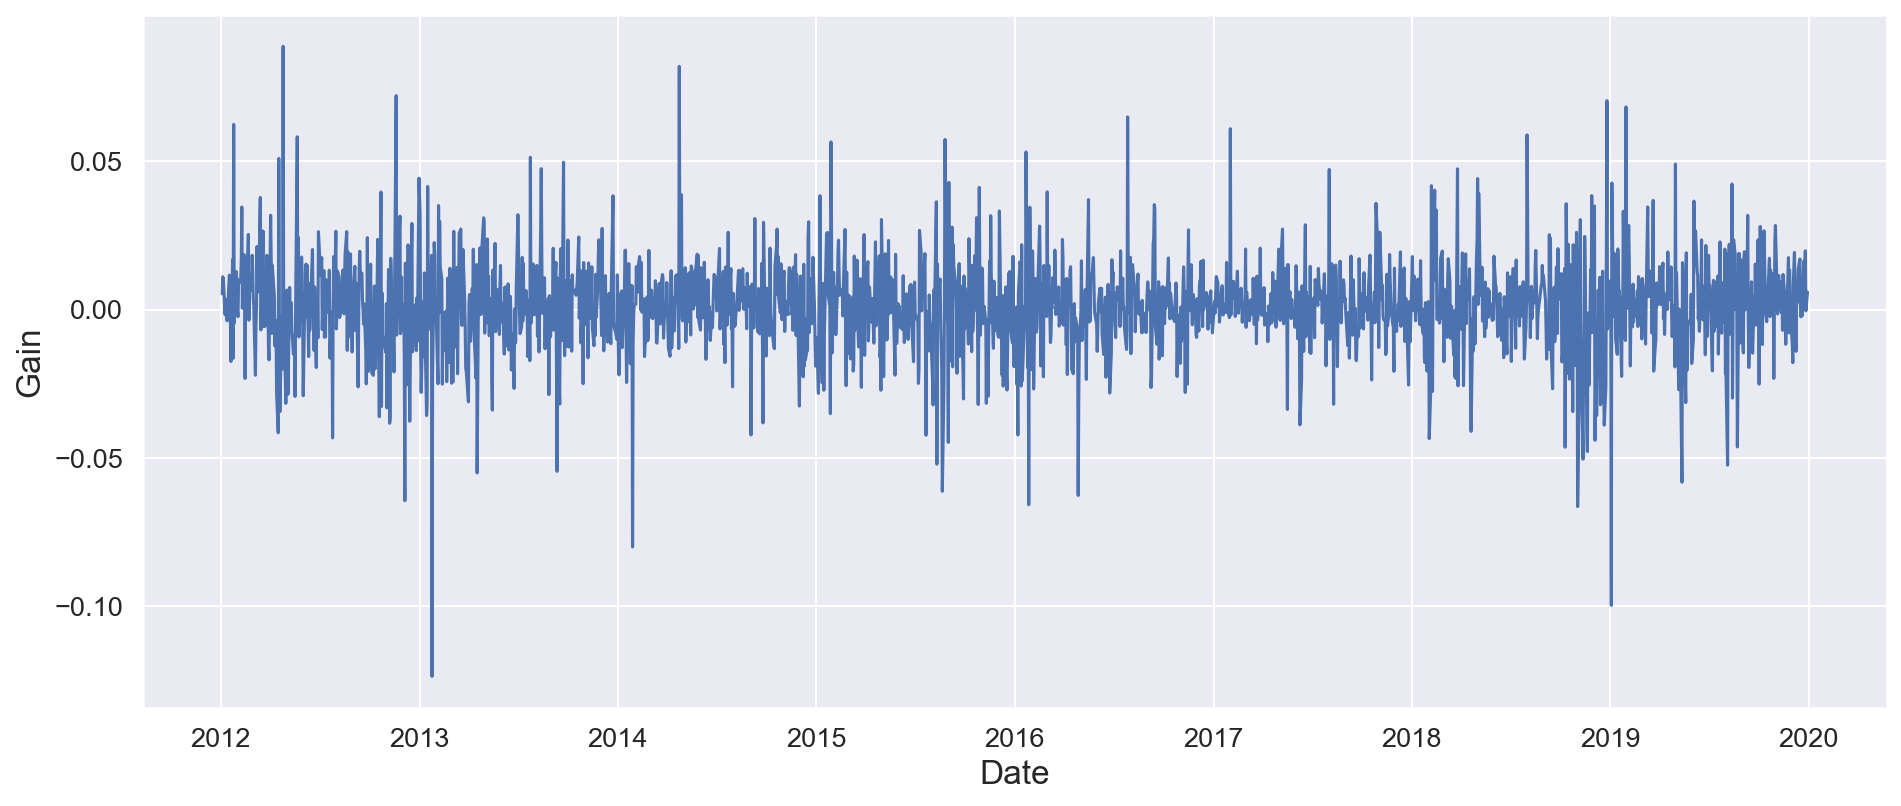

In [124]:
sns.set(rc={'figure.figsize':(15, 6), 'figure.dpi': 150, 'font.size': 16, 'xtick.labelsize': 13, 'ytick.labelsize': 13})
fig = sns.lineplot(df['Gain'])  # figure=plt.figure(figsize=(15, 6))

### Lineplot of Volume over the years 2012-2019

<Axes: xlabel='Date', ylabel='Volume'>

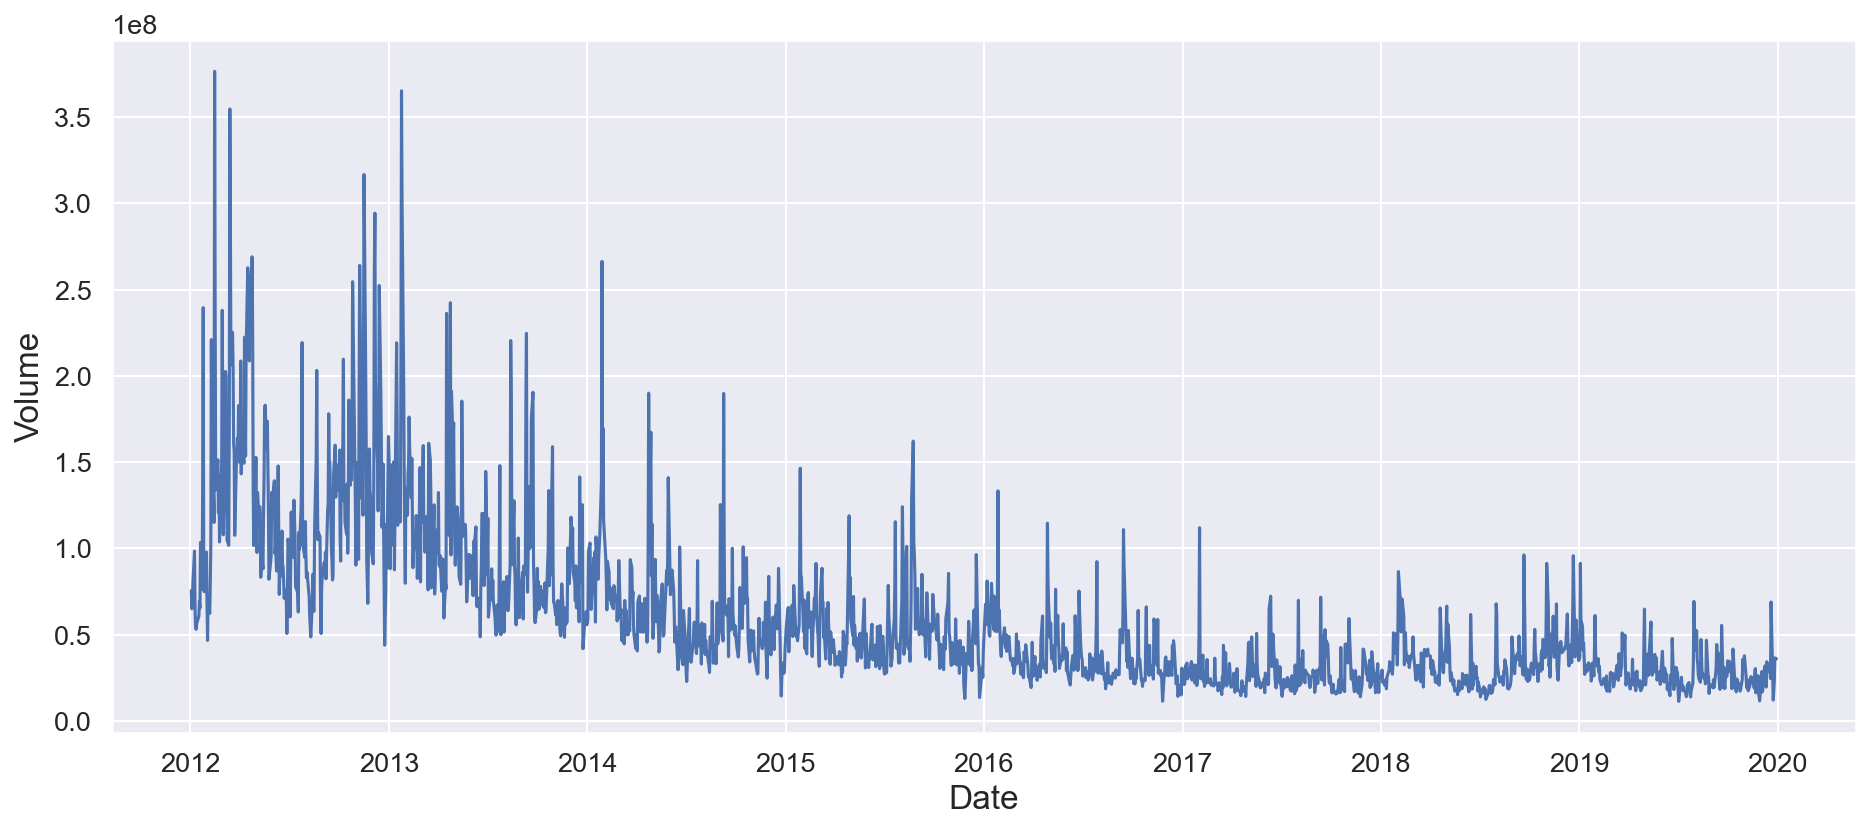

In [15]:
sns.lineplot(df['Volume'])

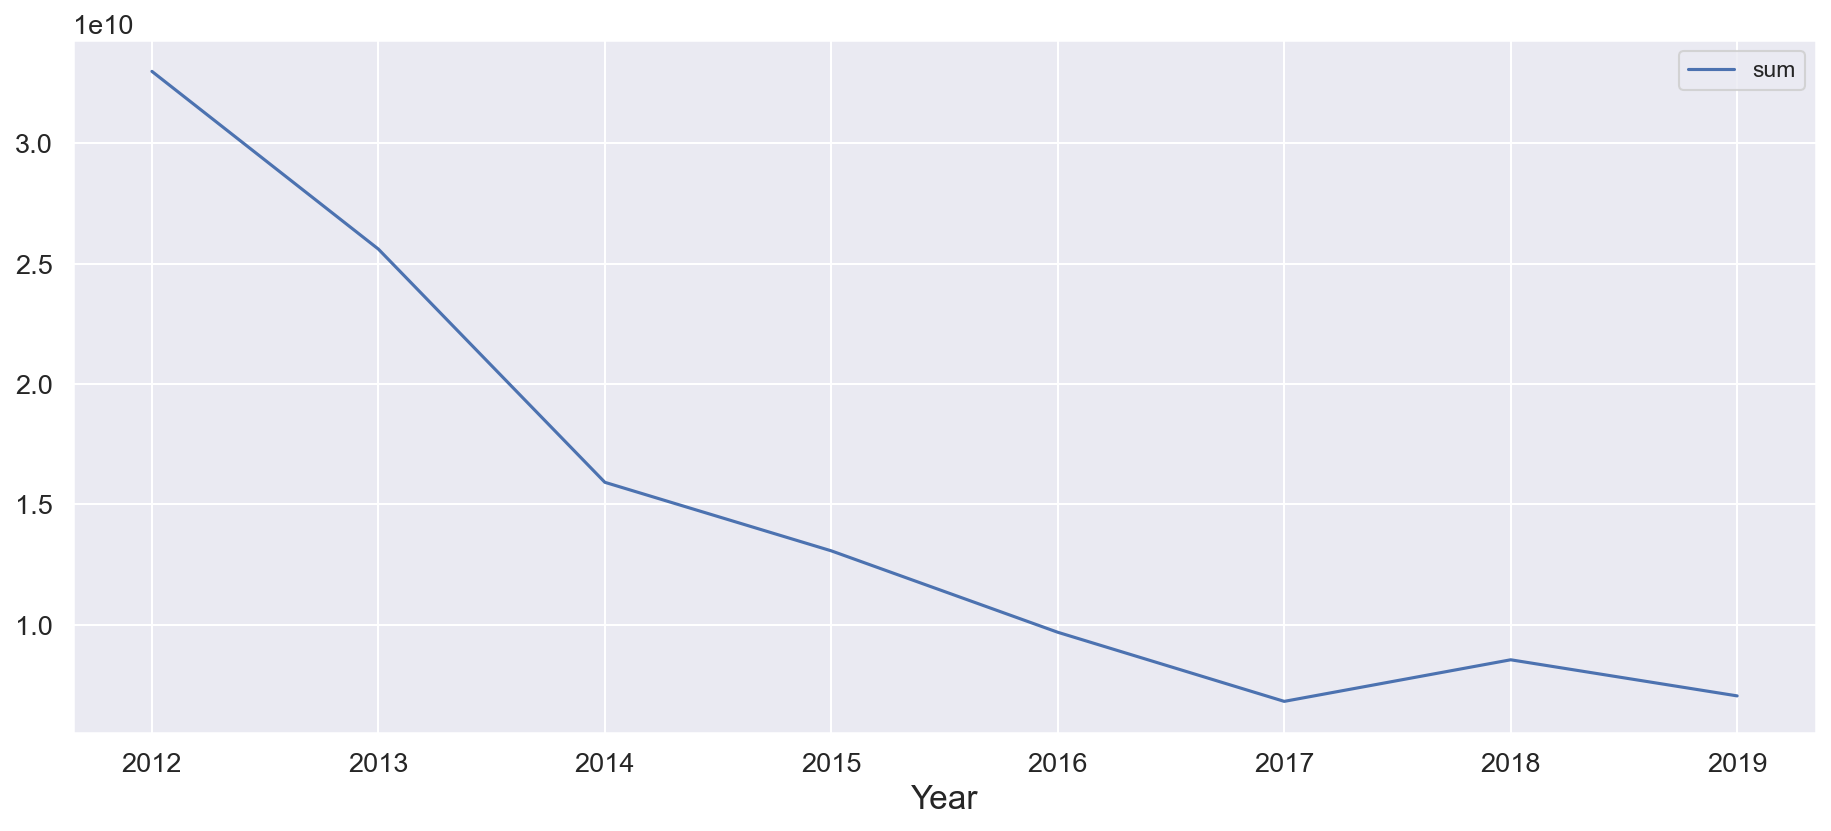

In [16]:
sns.lineplot(df.groupby(by='Year')['Volume'].agg({'sum'}))
plt.legend()

### Volume vs Adjusted Closing Price

<Axes: xlabel='Adj Close', ylabel='Volume'>

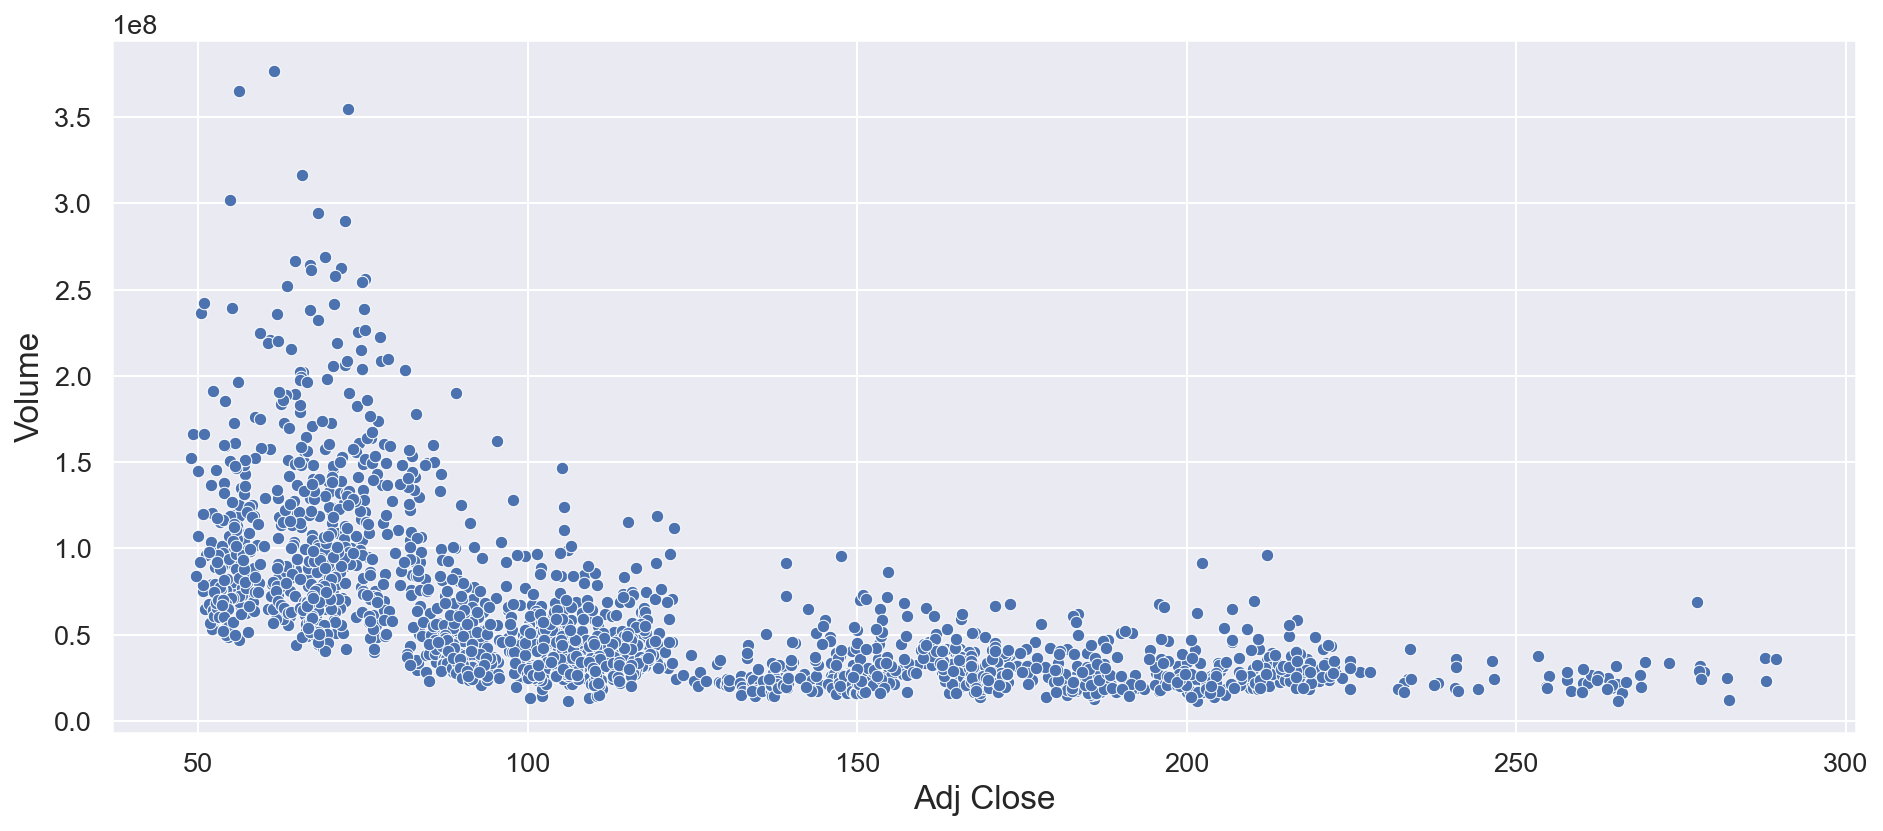

In [18]:
sns.scatterplot(x=df['Adj Close'], y=df['Volume'])

In [19]:
df.corr(numeric_only=True).loc['Volume']

Open        -0.557956
High        -0.554909
Low         -0.563426
Close       -0.559654
Adj Close   -0.566332
Volume       1.000000
Gain        -0.064232
Name: Volume, dtype: float64

### Lineplot for Adjusted Closing Price

<Axes: xlabel='Date', ylabel='Adj Close'>

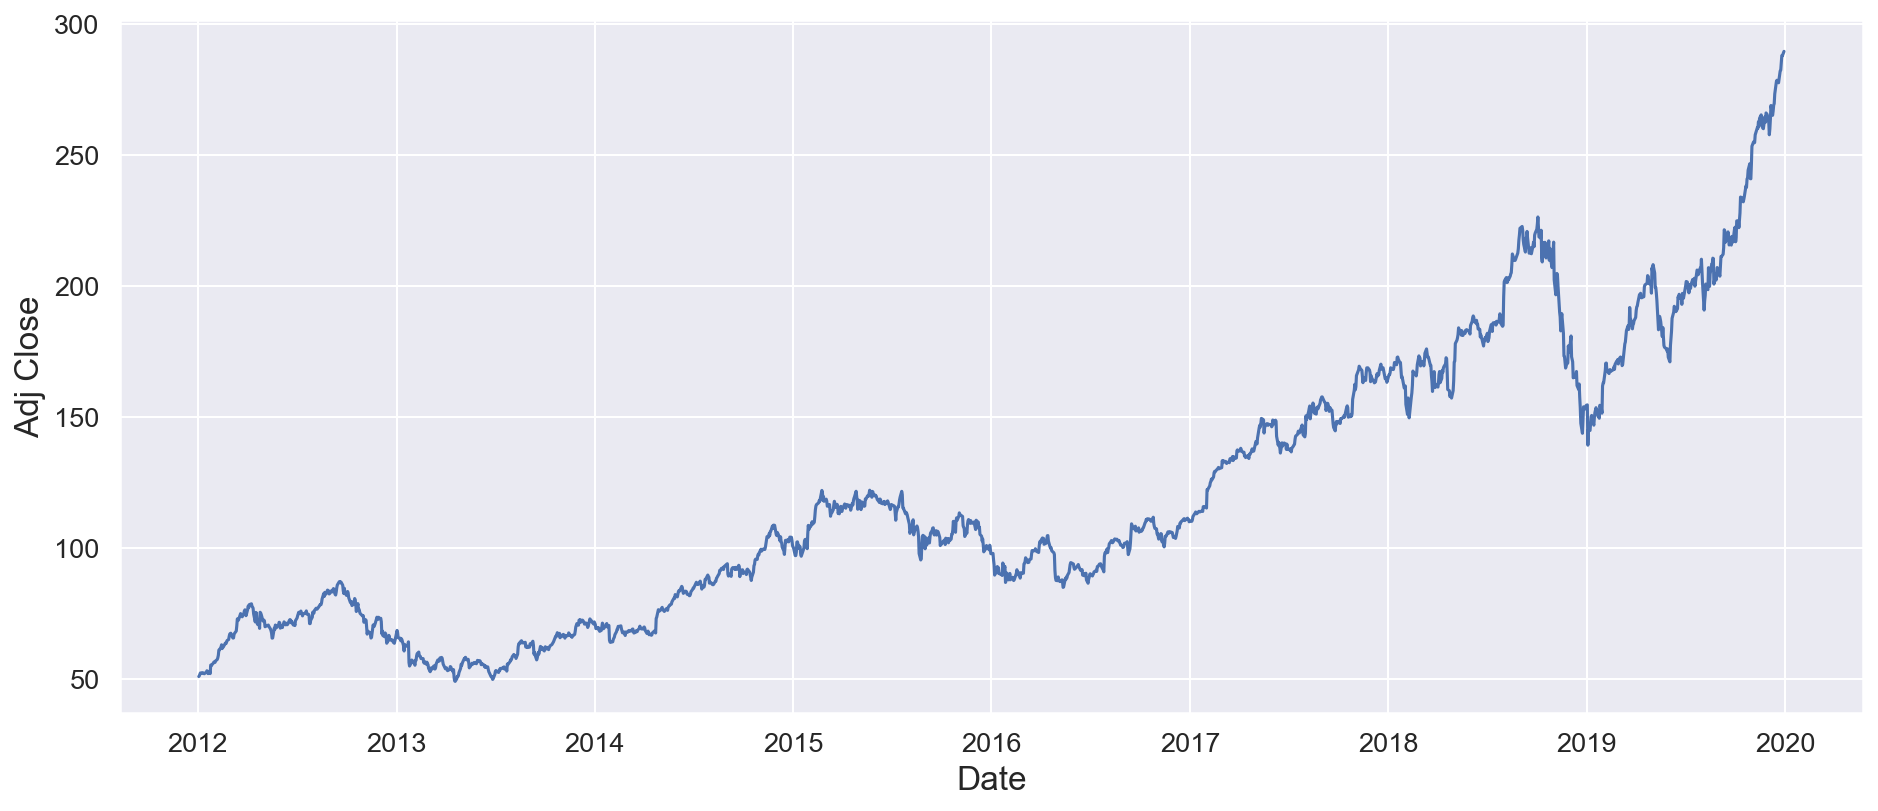

In [20]:
sns.lineplot(df['Adj Close'])

### Lineplot of Adjusted Closing Price for different months from 2012-2019

<Axes: xlabel='Month', ylabel='Adj Close'>

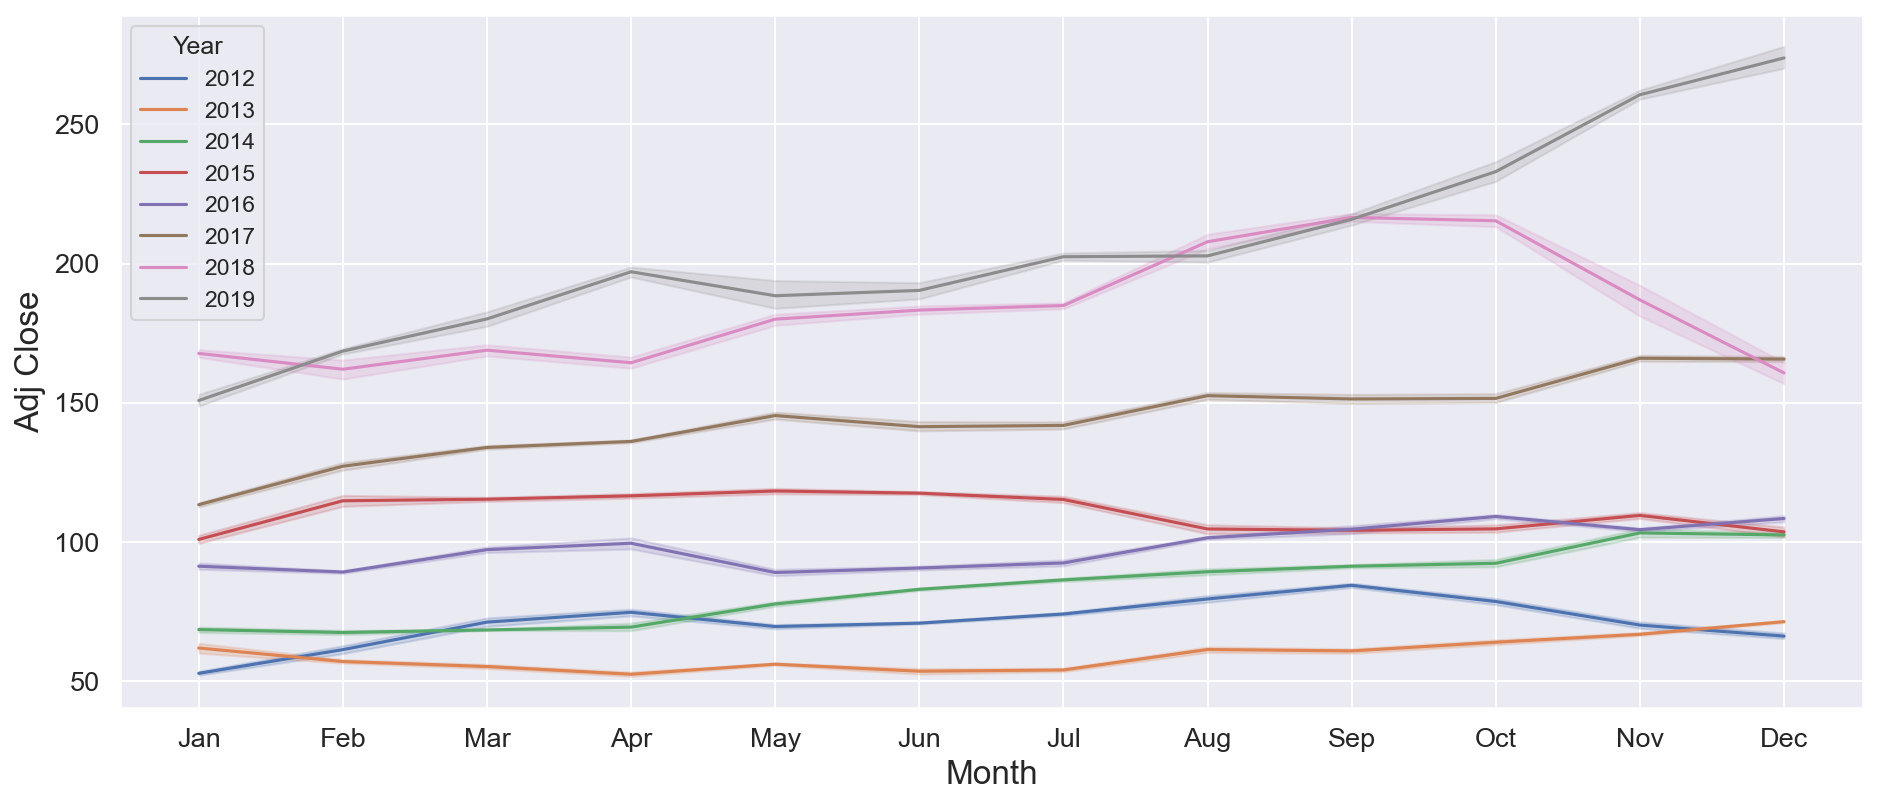

In [21]:
sns.lineplot(y=df['Adj Close'], x=df['Month'], hue=df['Year'])

### Checking if data is stationery or non stationery

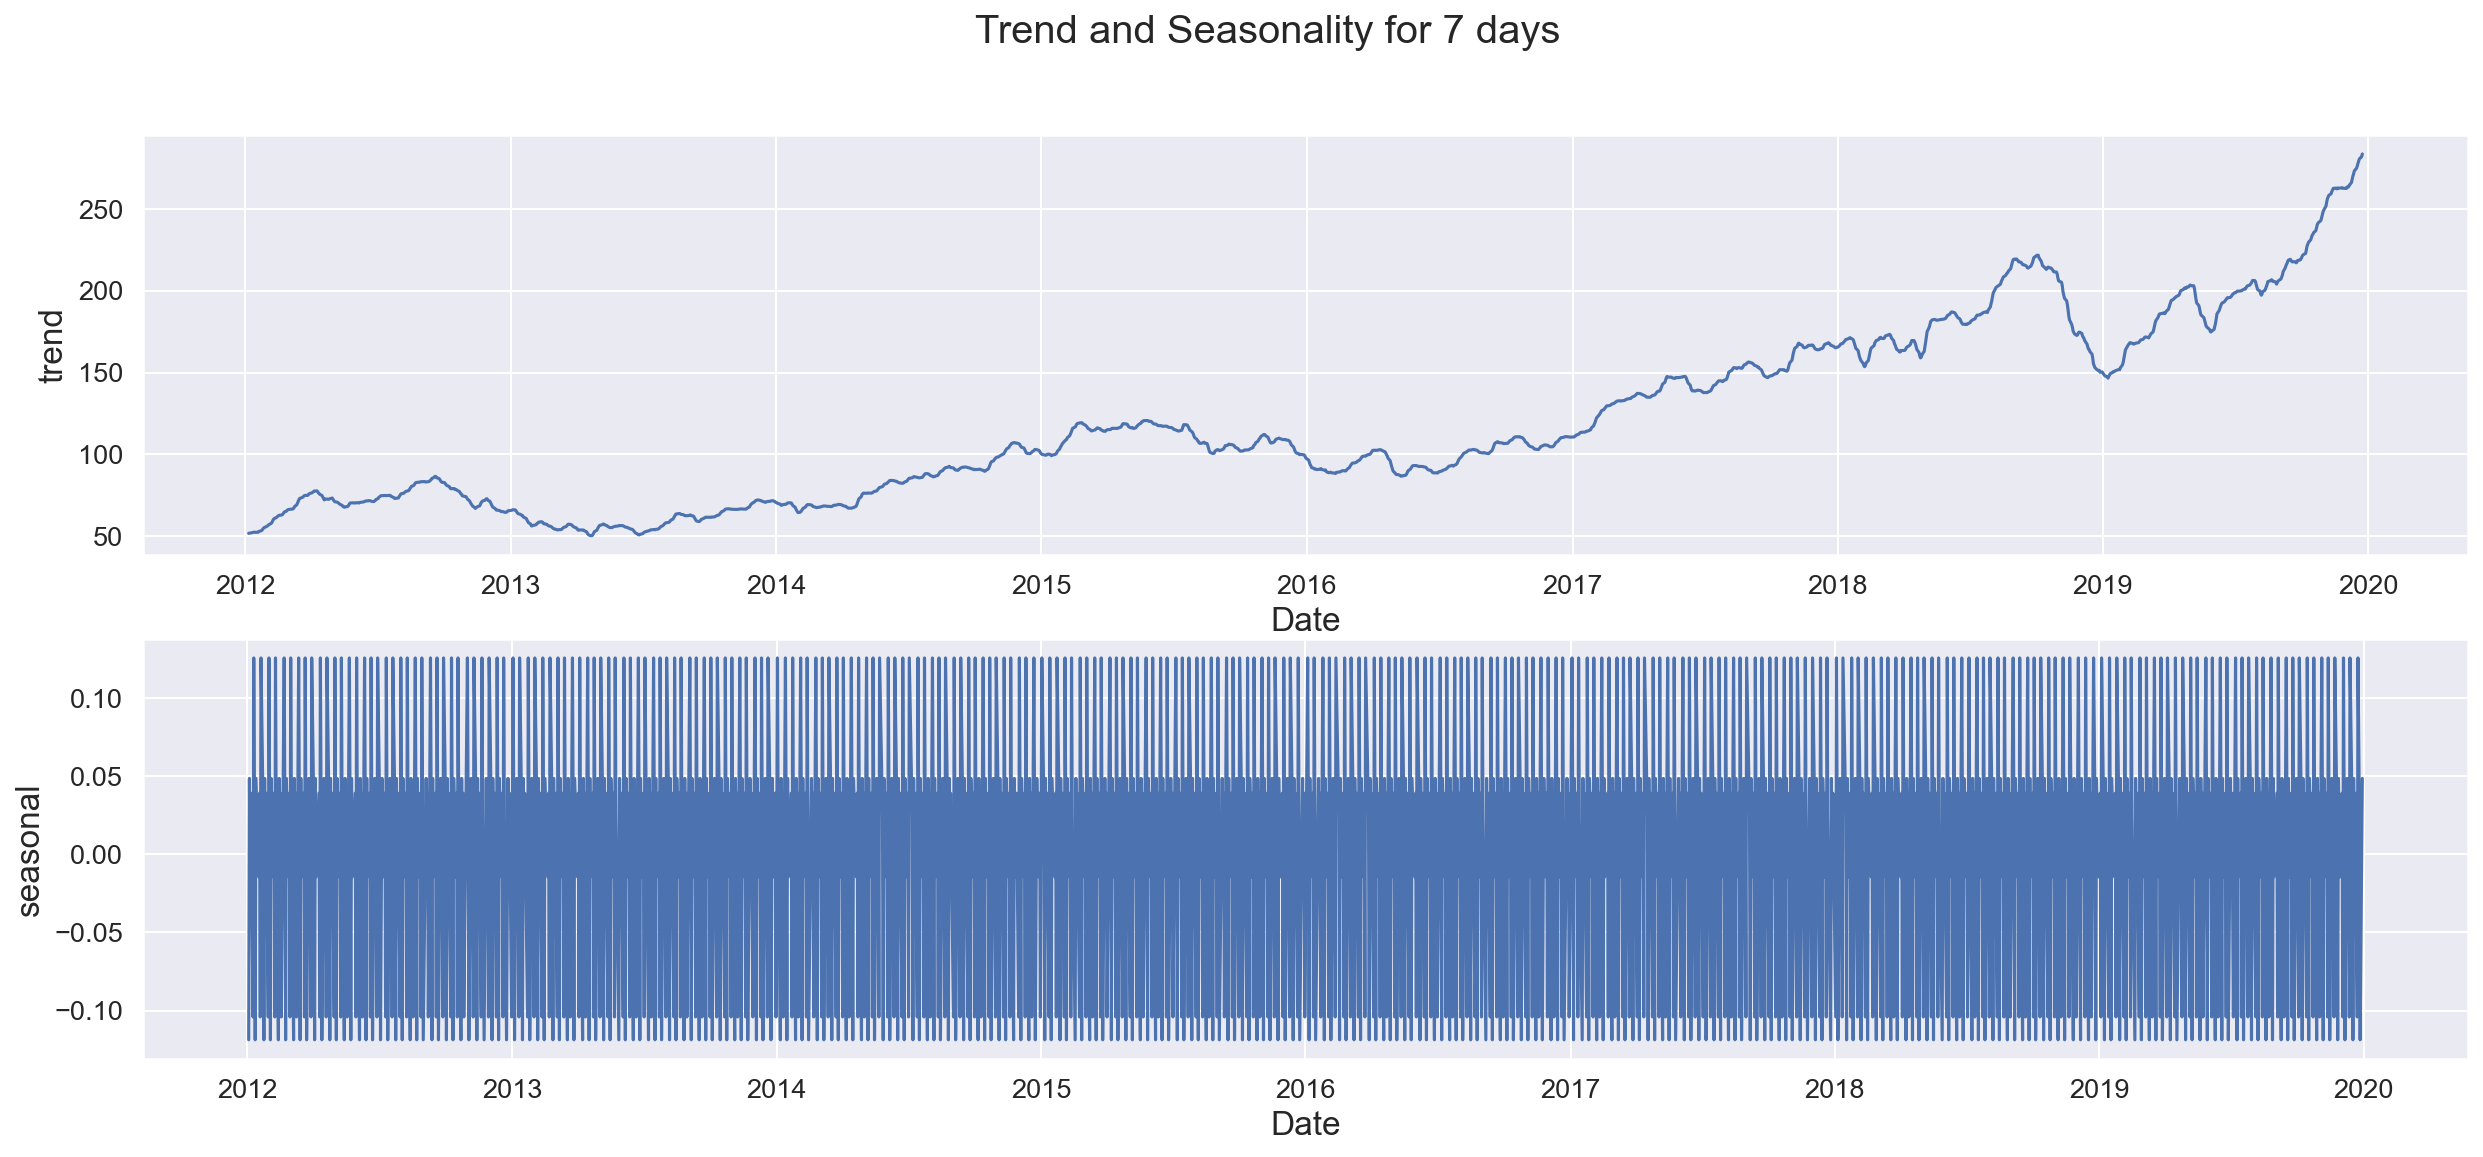

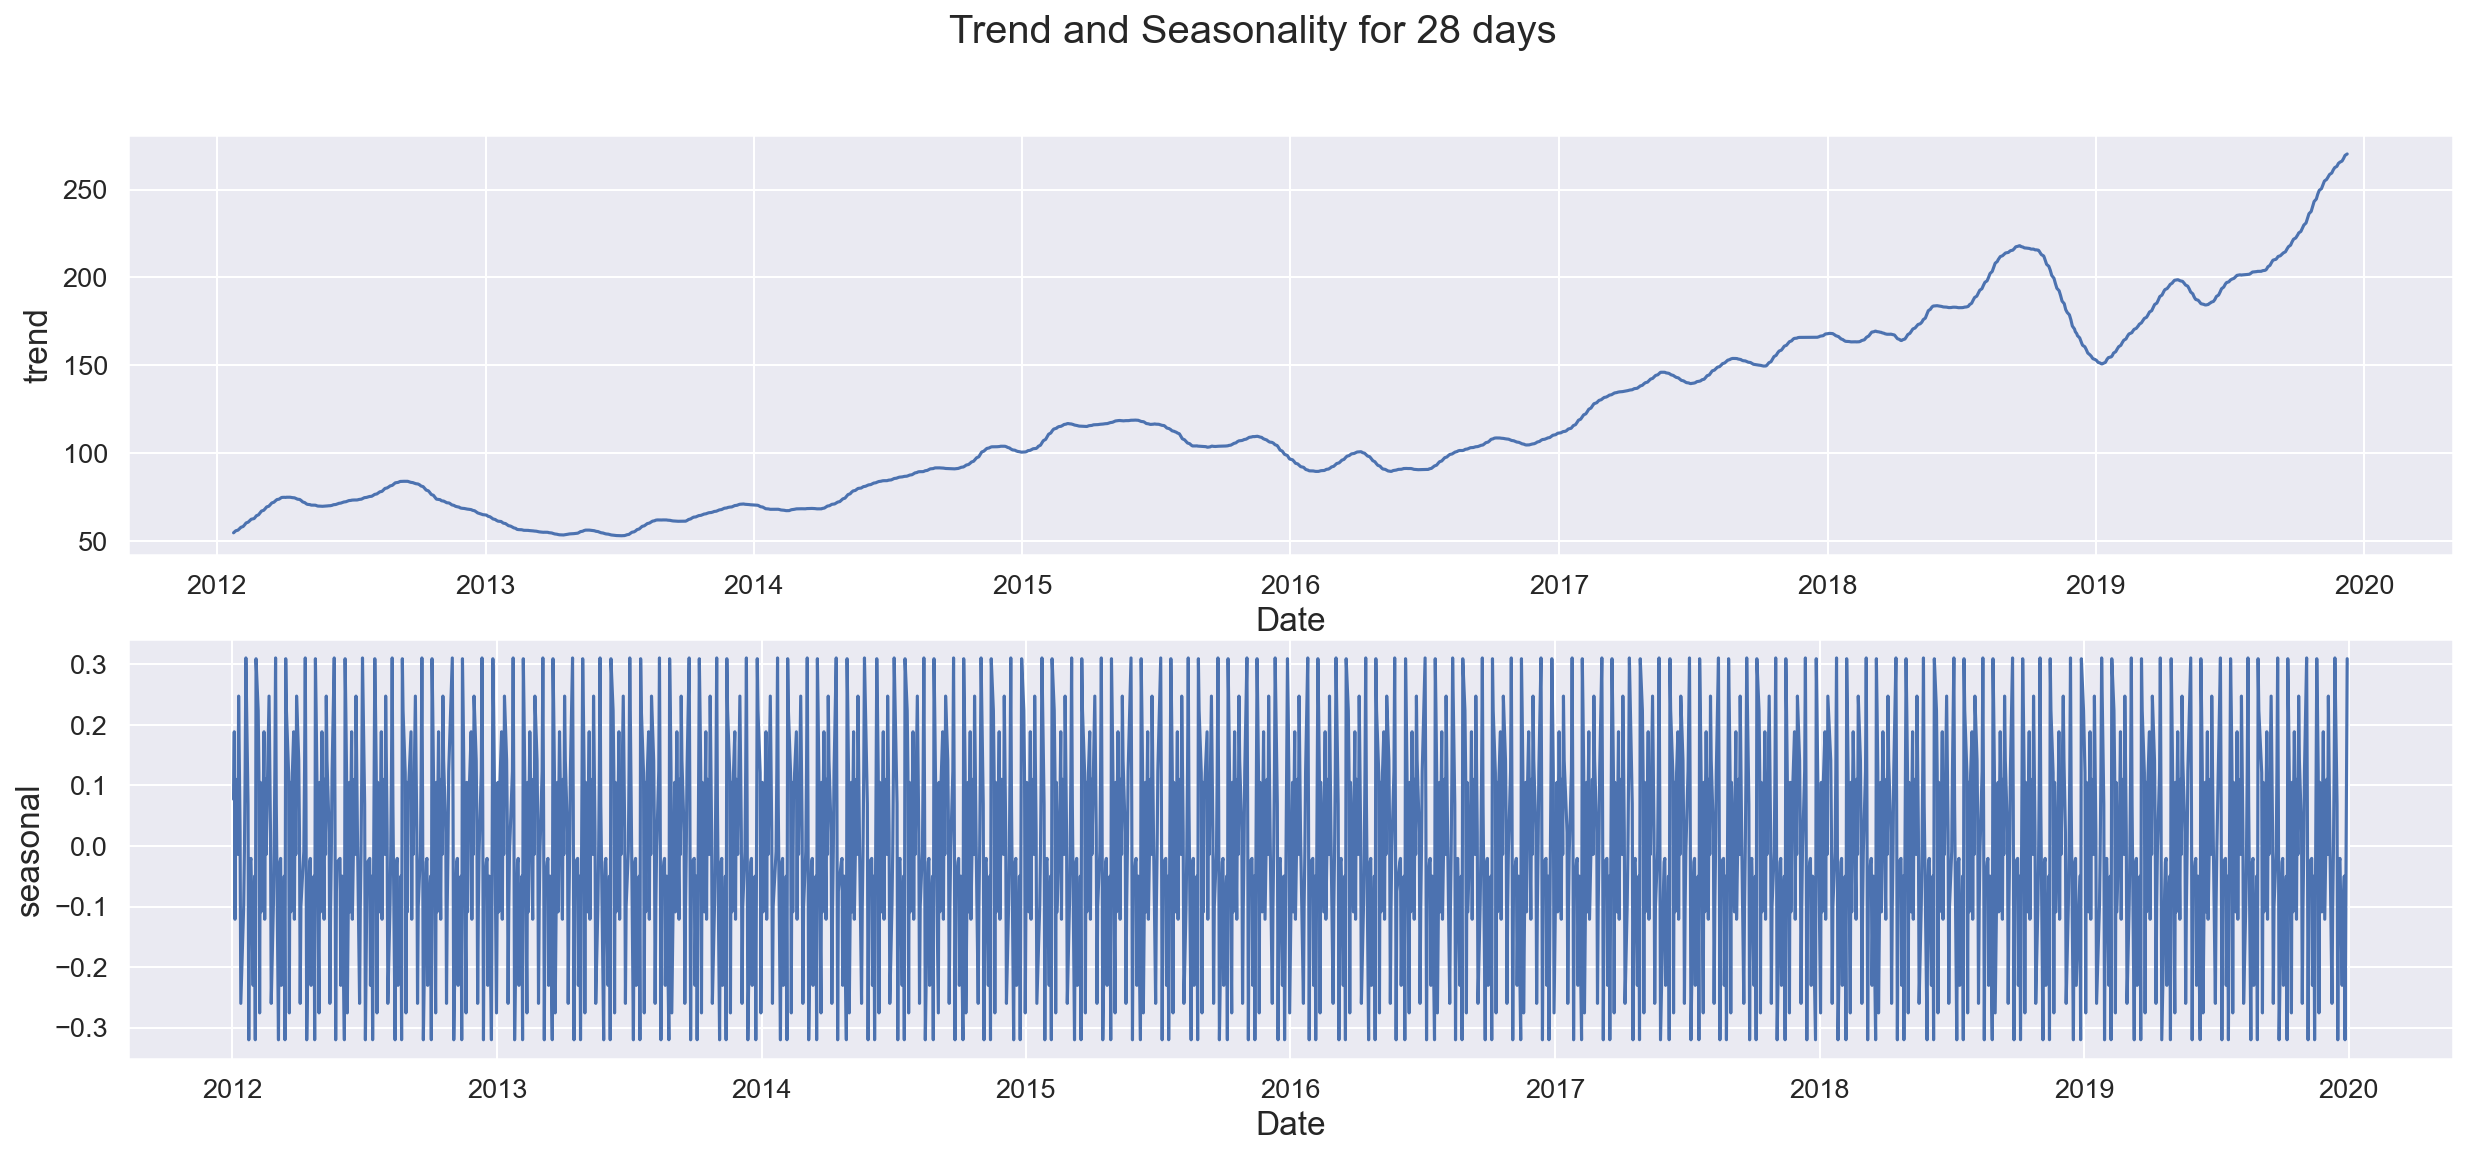

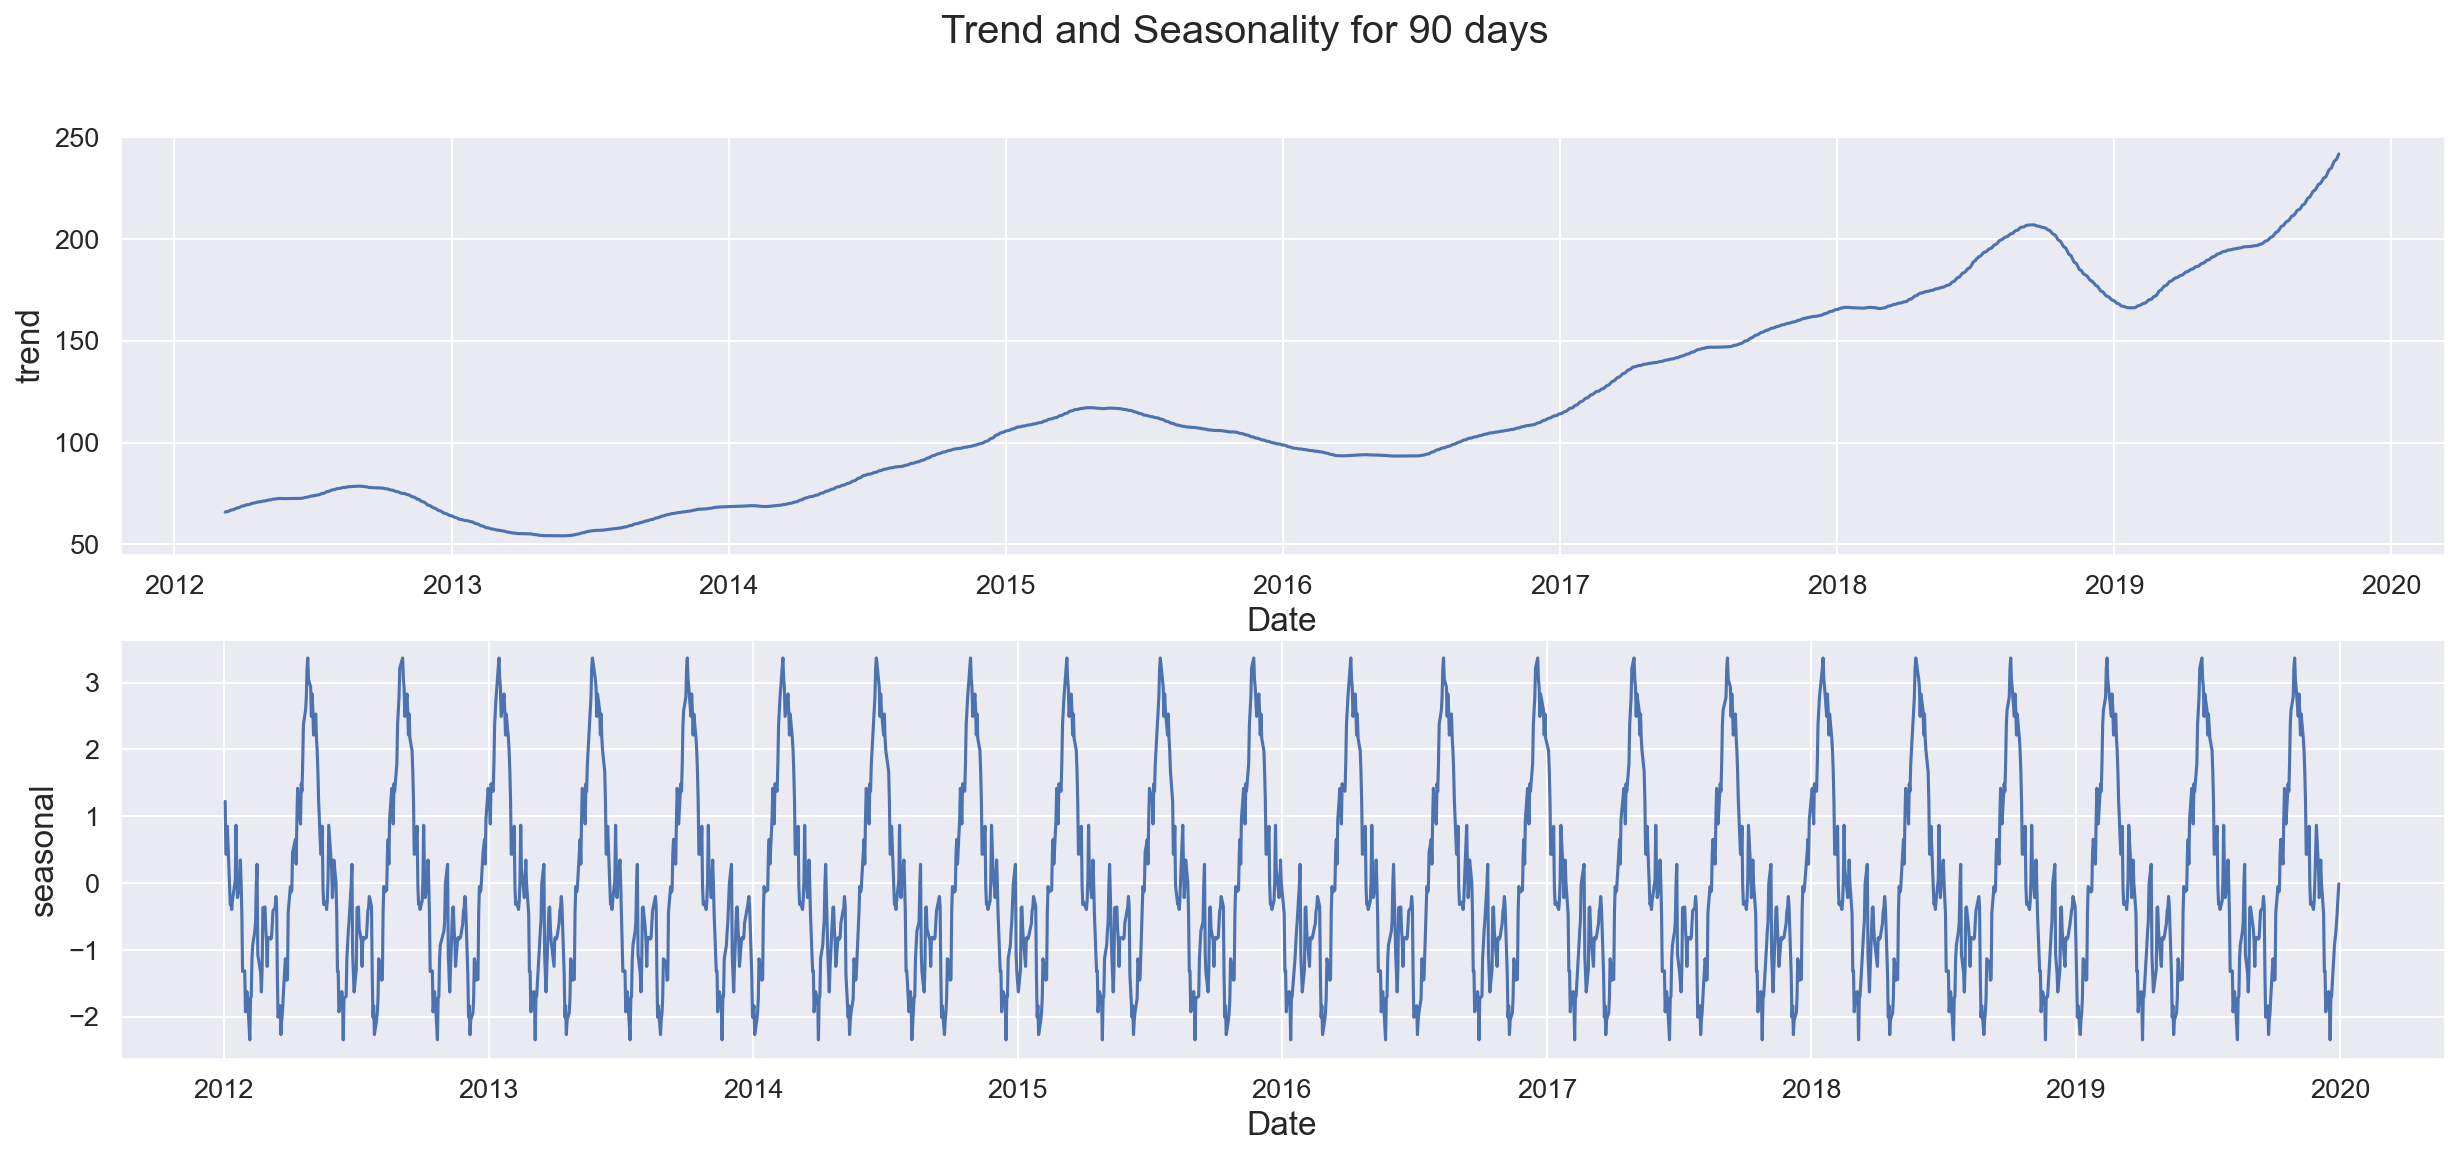

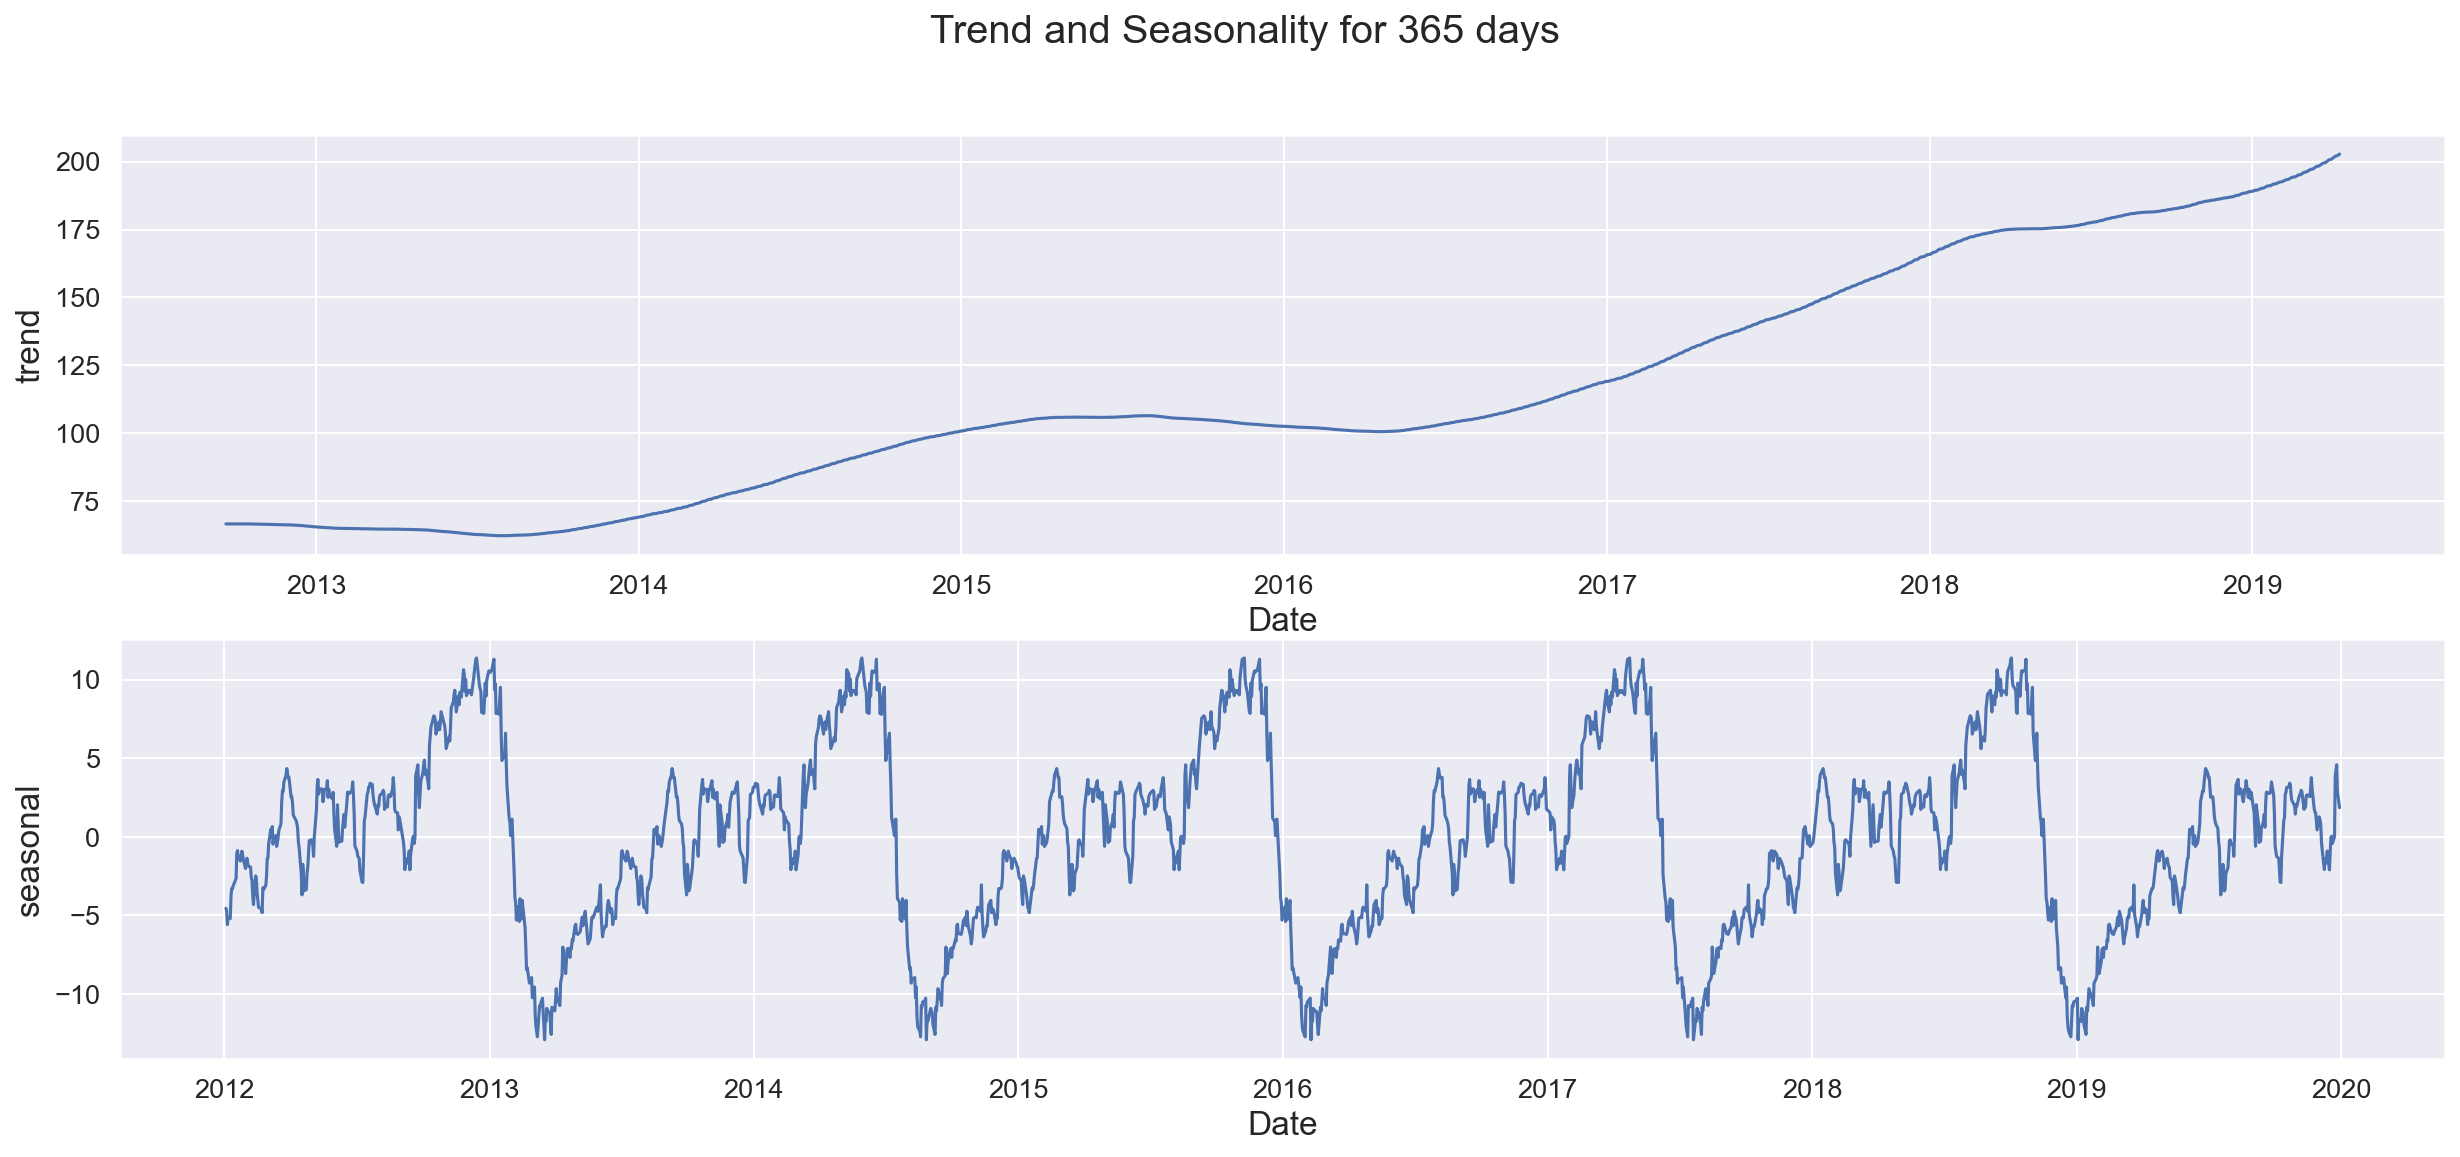

<Figure size 3000x1200 with 0 Axes>

In [64]:
sns.set(rc={'figure.figsize': (20, 8), 'figure.dpi': 150, 'font.size': 16, 'xtick.labelsize': 13, 'ytick.labelsize': 13})
windows = [7, 28, 90, 365]
for window in windows:
    decomp = seasonal_decompose(df['Adj Close'], period=window)
    plt.suptitle(f'Trend and Seasonality for {window} days')
    plt.subplot(2, 1, 1)
    sns.lineplot(decomp.trend)
    plt.subplot(2, 1, 2)
    sns.lineplot(decomp.seasonal)
    plt.show()    
    plt.tight_layout()

#### We can see that there is `upward trend` and `additive seasonality` in the above plots therefore the data is non stationary

### Lineplot with rolling average

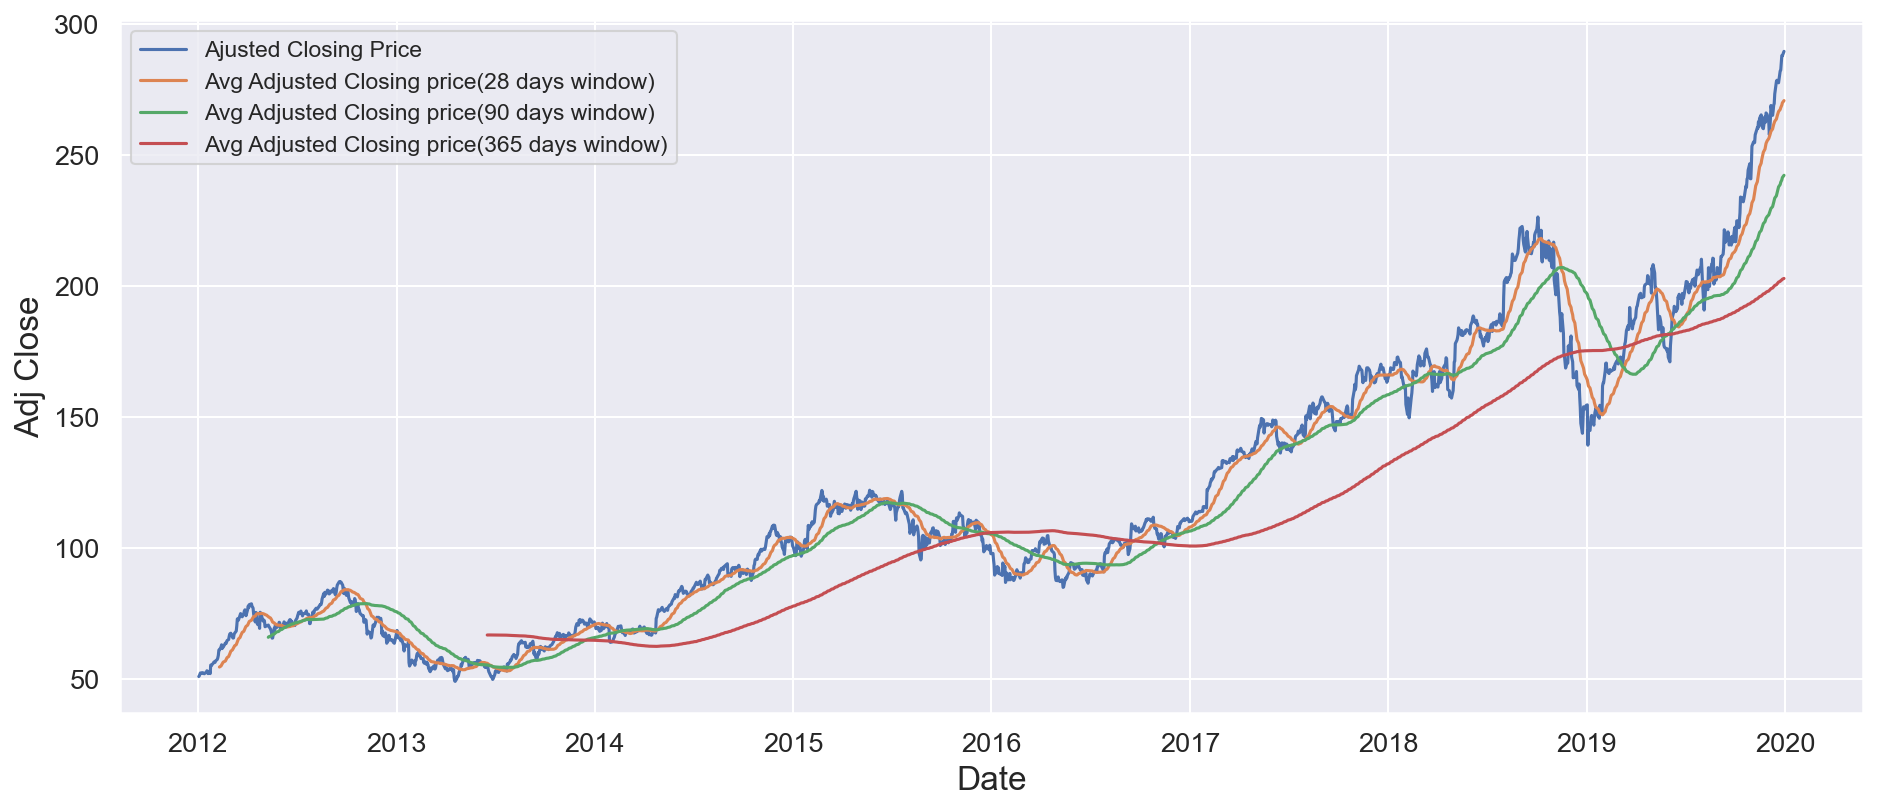

In [126]:
sns.lineplot(df['Adj Close'], label='Ajusted Closing Price')
windows = [28, 90, 365]

for window in windows:
    sns.lineplot(df['Adj Close'].rolling(window).mean(), label=f'Avg Adjusted Closing price({window} days window)')

### Performing Fuller's test to confirm whether the data is stationery or not
### If `pvalue > 0.05` then the data is non stationery else it is stationery

In [127]:
fuller = adfuller(df['Adj Close'])
print(f'pvalue = {fuller[1]}')
if fuller[1] < 0.05:
    print('Data is stationery')
else:
    print('Data is non stationery')

pvalue = 0.997345351966737
Data is non stationery


### As we can see that the data is not stationery we can perform one of the following to make data stationery
### 1.`Transformation`  2.`Differencing`  3.`Smoothing`

In [149]:
int('1101', 2)

13